# MODELO CONDUCTO N5 (CHOPPER) ==> fuente externa

In [1]:
# %pylab inline
# %matplotlib inline
from math import pi, sin, cos
import numpy as np
import openmc
import h5py
import matplotlib.pyplot as plt

## FLAGS

In [2]:
plots = True
plot_inline = True
BLOQUEADO = False  # En True el colimador es macizo
BISMUTO = True  # filtro de Bismuto
BEAMCATCHER = "NEW"
SHIELDING = True
SLITS = False  # slit de Cd que reproduce la apertura del chopper
ALBOX = False

## MATERIALES

### DEFINICION DE MATERIALES

In [3]:
# Combustible nuclear (dispersión de U3Si2 en aluminio)
Meat = openmc.Material(1, "Meat")
Meat.add_nuclide("U234", 1.7680e-05)
Meat.add_nuclide("U235", 2.4170e-03)
Meat.add_nuclide("U236", 1.3635e-05)
Meat.add_nuclide("U238", 9.6538e-03)
Meat.add_nuclide("Si28", 7.7125e-03)
Meat.add_nuclide("Si29", 3.9160e-04)
Meat.add_nuclide("Si30", 2.5814e-04)
Meat.add_nuclide("Al27", 3.0451e-02)
Meat.add_nuclide("B10", 3.8206e-07)
Meat.add_nuclide("B11", 1.5476e-06)
Meat.set_density("atom/b-cm", 5.0917e-02)

# Aleación de Aluminio 6061
Al6061 = openmc.Material(2, "Al6061")
Al6061.add_nuclide("Al27", 5.8811e-02)
Al6061.add_nuclide("Cu63", 4.6017e-05)
Al6061.add_nuclide("Cu65", 2.0510e-05)
Al6061.add_nuclide("Cr50", 1.4946e-06)
Al6061.add_nuclide("Cr52", 2.8822e-05)
Al6061.add_nuclide("Cr53", 3.2682e-06)
Al6061.add_nuclide("Cr54", 8.1352e-07)
Al6061.add_nuclide("Mg24", 6.6229e-4 * 0.7899)
Al6061.add_nuclide("Mg25", 6.6229e-4 * 0.1)
Al6061.add_nuclide("Mg26", 6.6229e-4 * 0.1101)
Al6061.add_nuclide("Si28", 3.5775e-04)
Al6061.add_nuclide("Si29", 1.8165e-05)
Al6061.add_nuclide("Si30", 1.1974e-05)
Al6061.add_nuclide("Fe54", 4.5947e-06)
Al6061.add_nuclide("Fe56", 7.2127e-05)
Al6061.add_nuclide("Fe57", 1.6657e-06)
Al6061.add_nuclide("Fe58", 2.2168e-07)
Al6061.add_nuclide("Mn55", 2.6637e-05)
Al6061.add_nuclide("Ti46", 3.3959e-06 * 0.0825)
Al6061.add_nuclide("Ti47", 3.3959e-06 * 0.0744)
Al6061.add_nuclide("Ti48", 3.3959e-06 * 0.7372)
Al6061.add_nuclide("Ti49", 3.3959e-06 * 0.0541)
Al6061.add_nuclide("Ti50", 3.3959e-06 * 0.0518)
Al6061.add_nuclide("B10", 2.9779e-07)
Al6061.add_nuclide("B11", 1.2062e-06)
Al6061.add_nuclide("Cd106", 9.0404e-10)
Al6061.add_nuclide("Cd108", 6.4368e-10)
Al6061.add_nuclide("Cd110", 9.0332e-09)
Al6061.add_nuclide("Cd111", 9.2574e-09)
Al6061.add_nuclide("Cd112", 1.7452e-08)
Al6061.add_nuclide("Cd113", 8.8379e-09)
Al6061.add_nuclide("Cd114", 2.0778e-08)
Al6061.add_nuclide("Cd116", 5.4170e-09)
Al6061.add_nuclide("Co59", 1.6554e-06)
Al6061.add_nuclide("Li6", 1.7780e-08)
Al6061.add_nuclide("Li7", 2.1648e-07)
Al6061.set_density("atom/b-cm", 6.0075e-02)

# Material de barras de control (Aleación de Plata, Indio y Cadmio)
AgInCd = openmc.Material(3, "AgInCd")
AgInCd.add_nuclide("Ag107", 2.3517e-02)
AgInCd.add_nuclide("Ag109", 2.1848e-02)
AgInCd.add_nuclide("In113", 7.9476e-03)
AgInCd.add_nuclide("Cd106", 3.5414e-05)
AgInCd.add_nuclide("Cd108", 2.5215e-05)
AgInCd.add_nuclide("Cd110", 3.5386e-04)
AgInCd.add_nuclide("Cd111", 3.6264e-04)
AgInCd.add_nuclide("Cd112", 6.8364e-04)
AgInCd.add_nuclide("Cd113", 3.4621e-04)
AgInCd.add_nuclide("Cd114", 8.1396e-04)
AgInCd.add_nuclide("Cd116", 2.1220e-04)
AgInCd.set_density("atom/b-cm", 5.6146e-02)

# Acero inoxidable tipo 304L
SS304L = openmc.Material(4, "SS304L")
SS304L.add_nuclide("C12", 6.0091e-05)
SS304L.add_nuclide("Mn55", 8.7583e-04)
SS304L.add_nuclide("Si28", 5.9254e-04)
SS304L.add_nuclide("Si29", 3.0086e-05)
SS304L.add_nuclide("Si30", 1.9833e-05)
SS304L.add_nuclide("Cr50", 7.6396e-04)
SS304L.add_nuclide("Cr52", 1.4732e-02)
SS304L.add_nuclide("Cr53", 1.6705e-03)
SS304L.add_nuclide("Cr54", 4.1582e-04)
SS304L.add_nuclide("Ni58", 5.5812e-03)
SS304L.add_nuclide("Ni60", 2.1499e-03)
SS304L.add_nuclide("Ni61", 9.3462e-05)
SS304L.add_nuclide("Ni62", 2.9793e-04)
SS304L.add_nuclide("Ni64", 7.5917e-05)
SS304L.add_nuclide("Fe54", 3.5011e-03)
SS304L.add_nuclide("Fe56", 5.4960e-02)
SS304L.add_nuclide("Fe57", 1.2693e-03)
SS304L.add_nuclide("Fe58", 1.6892e-04)
SS304L.add_nuclide("S32", 2.1340e-05)
SS304L.add_nuclide("S33", 1.7104e-07)
SS304L.add_nuclide("S34", 9.6546e-07)
SS304L.add_nuclide("S36", 4.5010e-08)
SS304L.add_nuclide("P31", 3.4953e-05)
SS304L.add_nuclide("N14", 1.7113e-04)
SS304L.add_nuclide("N15", 6.2865e-07)
SS304L.set_density("atom/b-cm", 8.7488e-02)

# Agua liviana - Moderador y refrigerante
H2O = openmc.Material(5, "H2O")
H2O.add_nuclide("H1", 6.6765e-02)
H2O.add_nuclide("O16", 3.3338e-02)
H2O.add_s_alpha_beta("c_H_in_H2O")
H2O.set_density("atom/b-cm", 1.0001e-01)

# Cadmio - Material absorbente usado en colimadores y "slits"
Cadmium = openmc.Material(6, "Cadmium")
Cadmium.add_nuclide("Cd106", 0.0125, "wo")
Cadmium.add_nuclide("Cd108", 0.0089, "wo")
Cadmium.add_nuclide("Cd110", 0.1249, "wo")
Cadmium.add_nuclide("Cd111", 0.1280, "wo")
Cadmium.add_nuclide("Cd112", 0.2413, "wo")
Cadmium.add_nuclide("Cd113", 0.1222, "wo")
Cadmium.add_nuclide("Cd114", 0.2873, "wo")
Cadmium.add_nuclide("Cd116", 0.0749, "wo")
Cadmium.set_density("atom/b-cm", 4.6340e-02)

# Aluminio puro
Aluminum = openmc.Material(7, "Aluminum")
Aluminum.add_nuclide("Al27", 6.0262e-02)
Aluminum.set_density("atom/b-cm", 6.0262e-02)

# Alúmina (óxido de aluminio) 
Alumina = openmc.Material(8, "Alumina")
Alumina.add_nuclide("Al27", 4.6778e-02)
Alumina.add_nuclide("O16", 7.0166e-02)
Alumina.set_density("atom/b-cm", 1.1694e-01)

# Grafito
Graphite = openmc.Material(9, "Graphite")
Graphite.add_nuclide("C12", 9.3758e-02)
Graphite.set_density("atom/b-cm", 9.3758e-02)

# Aire - rellenado de espacios no materiales
Air = openmc.Material(10, "Air")
Air.add_nuclide("O16", 1.0503e-05)
Air.add_nuclide("N14", 3.9094e-05)
Air.set_density("atom/b-cm", 4.95970723e-05)

# Acero inoxidable 316L
SS316L = openmc.Material(11, "SS316L")
SS316L.add_nuclide("C12", 0.001384, "ao")
SS316L.add_element("Si", 0.019722, "ao")
SS316L.add_element("P", 0.000805, "ao")
SS316L.add_element("S", 0.000518, "ao")
SS316L.add_element("Cr", 0.181098, "ao")
SS316L.add_element("Mn", 0.020165, "ao")
SS316L.add_element("Fe", 0.648628, "ao")
SS316L.add_element("Ni", 0.113247, "ao")
SS316L.add_element("Mo", 0.014434, "ao")
SS316L.set_density("g/cm3", 8.0)

# Concreto
Concrete = openmc.Material(12, "Concrete")
Concrete.add_nuclide("H1", 0.086069, "ao")
Concrete.add_nuclide("O16", 0.314488, "ao")
Concrete.add_element("Mg", 0.005516, "ao")
Concrete.add_element("Al", 0.014030, "ao")
Concrete.add_element("Si", 0.020499, "ao")
Concrete.add_element("Ca", 0.050769, "ao")
Concrete.add_element("Ti", 0.012192, "ao")
Concrete.add_element("V", 0.000464, "ao")
Concrete.add_element("Fe", 0.495972, "ao")
Concrete.set_density("g/cm3", 4.64)

# Plomo
Lead = openmc.Material(13, "Lead")
Lead.add_element("Pb", 1.0, "wo")
Lead.set_density("g/cm3", 11.35)

# Polímero borado
Polyborated = openmc.Material(14, "Polyborated")
Polyborated.add_nuclide("H1", 0.627759, "ao")
Polyborated.add_element("B", 0.046690, "ao")
Polyborated.add_nuclide("C12", 0.325552, "ao")
Polyborated.set_density("g/cm3", 1)

# Helio-3 - gas detector
pressure = 10  # bars
# densité du gaz @1bar 22° = 1.206E-4 g/cm3
He3 = openmc.Material(15, "Helium3")
He3.add_nuclide("He3", 1.0)
He3.set_density("g/cm3", 1.206e-4 * pressure)

# Bismuto - material filtrante para atenuar neutrones rápidos
Bi = openmc.Material(16, "Bismuth")
Bi.add_element("Bi", 1.0, "wo")
Bi.set_density("g/cm3", 9.8)  # revisar

### Colores
Este bloque intenta agregar colores a todos los materiales posibles si fueron definidos previamente.
Si alguno no fue creado (por ejemplo, en modelos reducidos), simplemente se omite.

In [4]:
# materials_colors={Meat:'red',Al6061:'silver',AgInCd:'black',SS304L:'grey',H2O:'lightblue',Cadmium:'black',
#                   Aluminum:'silver',Alumina:'silver',Graphite:'yellow',SS316L:'gray',Concrete:'orange',
#                   Lead:'black',Polyborated:'coral',Air:'white'}
# materials_colors = {
#     Al6061: "silver",
#     SS316L: "gray",
#     Concrete: "lightgrey",
#     Lead: "black",
#     Polyborated: "coral",
#     Air: "white",
#     Cadmium: "red",
#     He3: "yellow",
#     Bi: "blue",
# }

# Este bloque intenta agregar colores a todos los materiales posibles si fueron definidos previamente.
# Si alguno no fue creado (por ejemplo, en modelos reducidos), simplemente se omite.

materials_colors = {}

# Lista de posibles pares (material, color)
material_color_pairs = [
    ("Meat", "red"),
    ("Al6061", "silver"), # Porque esto esta antes del colimador? y porque hay un gap?
    ("AgInCd", "black"),
    ("SS304L", "grey"),
    ("SS316L", "gray"),
    ("H2O", "lightblue"),
    ("Cadmium", "black"),
    ("Aluminum", "silver"),
    ("Alumina", "silver"),
    ("Graphite", "yellow"),
    ("Concrete", "orange"),
    ("Lead", "black"),
    ("Polyborated", "coral"),
    ("Air", "white"),
    ("He3", "yellow"),
    ("Bi", "blue"),
]

# Usamos eval de forma controlada para construir el diccionario sin romper si falta alguna variable
for mat_name, color in material_color_pairs:
    try:
        mat_obj = eval(mat_name)
        materials_colors[mat_obj] = color
    except NameError:
        pass  # El material no está definido en este modelo

## GEOMETRÍA GENERAL

In [5]:
# --- Conducto pasante (más cercano al núcleo, sumergido en la pileta) ---
R4int = 10.226 / 2  # radio interno primera sección del conducto pasante N5
R4ext = 11.43 / 2  # radio externo primera sección del conducto pasante N5
L4int = 0.0  # inicio del conducto no pasante N5 (limite pileta del reactor)
L4ext = (
    L4int + 98.4151
)  # final del primer tramo del conducto no pasante N5. Largo total: 68.6+30.75 cm

# --- Conducto externo (pasante fuera del blindaje interno) ---
R6int = 15.406 / 2  # radio interno segunda sección del conducto pasante N5
R6ext = 16.828 / 2  # radio externo segunda sección del conducto pasante N5
L6int = (
    L4ext + 13.7
)  # Separación entre secciones internas y externas (~espacio muerto?)
L6ext = (
    L6int + 53.1 + 0.9
)  # 166cm==>final del conducto no pasante N5 (limite blindaje biológico, antes del shutter de plomo)

# --- Colimador? ---
R5int = 12.328 / 2  # dimensiones colimador???
R5ext = 12.788 / 2
L5int = L6int + 1.6 # Ubicado un poco después del comienzo de la segunda sección
L5ext = L6ext       # Ocupa hasta el final del tubo externo

Rpieza = 12.2 / 2
Lpieza = 5.0

Lp00 = L5int + 1.0
Lp01 = Lp00 + Lpieza
Lp02 = Lp01 + Lpieza
Lp03 = Lp02 + Lpieza
Lp04 = Lp03 + Lpieza
Lp05 = Lp04 + Lpieza
Lp06 = Lp05 + Lpieza
Lp07 = Lp06 + Lpieza
Lp08 = Lp07 + Lpieza
Lp09 = Lp08 + Lpieza
Lp10 = Lp09 + Lpieza

L4ext,L6int,L6ext,L5int,L5ext,Lp00,Lp10

(98.4151,
 112.1151,
 166.1151,
 113.71509999999999,
 166.1151,
 114.71509999999999,
 164.7151)

In [6]:
Linner = L4int - 10
Louter = L6ext + 38.0849 + 290
Linner,Louter-290,Louter

(-10.0, 204.20000000000005, 494.20000000000005)

## PROPUESTA DE BEAM-CATCHER

In [7]:
if SHIELDING and BEAMCATCHER != False:
    ybeamcatcher = 205.0
else:
    ybeamcatcher = 90.0

if BEAMCATCHER == "NEW":
    yb0 = Louter - 290.0 + ybeamcatcher
    yb1 = yb0 + 35 - 5 * 2
    yb2 = yb1 + 5 * 2  # espesor poliboro
    yb3 = yb2 + 5 * 2  # espesor poliboro
    yb4 = yb3 + 10 * 2  # espesor plomo

    xb0 = 0.0
    xb1 = xb0 + 20.0 / 2
    xb2 = xb1 + 5 * 2  # espesor poliboro
    xb3 = xb2 + 5 * 2  # espesor plomo

    zb0 = 0.0
    zb1 = zb0 + 40.0 / 2
    zb2 = zb1 + 5 * 2
    zb3 = zb2 + 5 * 2
elif BEAMCATCHER == "OLD":
    yb0 = Louter - 290.0 + ybeamcatcher
    yb1 = yb0 + 35 - 5
    yb2 = yb1 + 5  # espesor poliboro
    yb3 = yb2 + 5  # espesor poliboro
    yb4 = yb3 + 10  # espesor plomo

    xb0 = 0.0
    xb1 = xb0 + 20.0 / 2
    xb2 = xb1 + 5  # espesor poliboro
    xb3 = xb2 + 5  # espesor plomo

    zb0 = 0.0
    zb1 = zb0 + 25.0 / 2
    zb2 = zb1 + 5
    zb3 = zb2 + 5
elif BEAMCATCHER == False:
    print("No hay beam-catcher")
else:
    print("ERROR")

In [8]:
yshielding = 0.1

ys0 = Louter - 290.0 + yshielding
ys1 = ys0 + 5.0 * 2.0
ys2 = ys1 + 5.0 * 2.0

xs0 = 0.0
xs1 = xs0 + 8.0 / 2  # 12.0/2
xs2 = xs1 + 80.0 / 2  # 25.5

zs0 = 0.0
zs1 = zs0 + 8.0 / 2  # 12.0/2
zs2 = zs1 + 80.0 / 2  # 56.0/2

print("yshielding: ", yshielding)
print("ys0, ys1, ys2: ", ys0, ys1, ys2)
print("xs0, xs1, xs2: ", xs0, xs1, xs2)
print("zs0, zs1, zs2: ", zs0, zs1, zs2)


yshielding:  0.1
ys0, ys1, ys2:  204.30000000000004 214.30000000000004 224.30000000000004
xs0, xs1, xs2:  0.0 4.0 44.0
zs0, zs1, zs2:  0.0 4.0 44.0


In [9]:
yCd = 1.0

yCd0 = ys2 + yCd
yCd1 = yCd0 + 0.5

xCd0 = 0.0
xCd1 = xCd0 + 0.5 / 2
xCd2 = xCd1 + 12.0 / 2

zCd0 = 0.0
zCd1 = zCd0 + 1.0 / 2
zCd2 = zCd1 + 12.0 / 2

print("yCd: ", yCd)
print("yCd0, yCd1: ", yCd0, yCd1)
print("xCd0, xCd1, xCd2: ", xCd0, xCd1, xCd2)
print("zCd0, zCd1, zCd2: ", zCd0, zCd1, zCd2)

yCd:  1.0
yCd0, yCd1:  225.30000000000004 225.80000000000004
xCd0, xCd1, xCd2:  0.0 0.25 6.25
zCd0, zCd1, zCd2:  0.0 0.5 6.5


In [10]:
if BEAMCATCHER != False:
    ydetector = ybeamcatcher - 5.0
else:
    ydetector = 200

yd0 = Louter - 290.0 + ydetector
yd1 = yd0 + 1 * 2.54

xd0 = 0.0
xd1 = xd0 + 3.5 * 2.54

zd0 = 0.0
zd1 = zd0 + 5 * 2.54

print("ydetector: ", ydetector)
print("yd0, yd1: ", yd0, yd1)
print("xd0, xd1: ", xd0, xd1)
print("zd0, zd1: ", zd0, zd1)

ydetector:  200.0
yd0, yd1:  404.20000000000005 406.74000000000007
xd0, xd1:  0.0 8.89
zd0, zd1:  0.0 12.7


In [11]:
yAl0 = yCd1 + 0.1
yAl1 = yd0 - 0.1

xAl0 = 0.0
xAl1 = xAl0 + xb1
xAl2 = xAl1 + 1.0

zAl0 = 0.0
zAl1 = zAl0 + zb1
zAl2 = zAl1 + 1.0

print("yAl0, yAl1: ", yAl0, yAl1)
print("xAl0, xAl1, xAl2: ", xAl0, xAl1, xAl2)
print("zAl0, zAl1, zAl2: ", zAl0, zAl1, zAl2)

yAl0, yAl1:  225.90000000000003 404.1
xAl0, xAl1, xAl2:  0.0 10.0 11.0
zAl0, zAl1, zAl2:  0.0 20.0 21.0


## GEOMETRÍA CONDUCTO N5

In [12]:
sur5000 = openmc.YPlane(y0=L4int, surface_id=5000)
sur5001 = openmc.YPlane(y0=L4ext, surface_id=5001)
sur5002 = openmc.YPlane(y0=L6int, surface_id=5002)
sur5003 = openmc.YPlane(y0=L6ext, surface_id=5003)

sur5004 = openmc.YCylinder(r=R4int, surface_id=5004)
sur5005 = openmc.YCylinder(r=R4ext, surface_id=5005)
sur5006 = openmc.YCone(
    y0=(R4int * L6int - R6int * L4ext) / (R4int - R6int),
    r2=((R4int - R6int) / (L6int - L4ext)) ** 2,
    surface_id=5006,
)
sur5007 = openmc.YCone(
    y0=(R4ext * L6int - R6ext * L4ext) / (R4ext - R6ext),
    r2=((R4ext - R6ext) / (L6int - L4ext)) ** 2,
    surface_id=5007,
)
sur5008 = openmc.YCylinder(r=R6int, surface_id=5008)
sur5009 = openmc.YCylinder(r=R6ext, surface_id=5009)
sur5010 = openmc.YPlane(y0=L4int + 5.0, surface_id=5010)

# Blindaje interno
sur5011 = openmc.XPlane(x0=-62.86, surface_id=5011)
sur5012 = openmc.XPlane(x0=27.86, surface_id=5012)
sur5013 = openmc.YPlane(y0=L6ext - 9.55, surface_id=5013)
sur5014 = openmc.YPlane(y0=L6ext - 3.84, surface_id=5014)
sur5015 = openmc.ZPlane(z0=-56.0 / 2, surface_id=5015)
sur5016 = openmc.ZPlane(z0=56.0 / 2, surface_id=5016)

# Caja conducto
sur5020 = openmc.XPlane(x0=-60.5, surface_id=5020)
sur5021 = openmc.XPlane(x0=25.5, surface_id=5021)
sur5022 = openmc.ZPlane(z0=-56.0 / 2, surface_id=5022)
sur5023 = openmc.ZPlane(z0=56.0 / 2, surface_id=5023)

# Shutter conducto (370 ancho, 340 profundidad, 450 altura, )
XSHUTTER = 37.0
sur5030 = openmc.YPlane(y0=L6ext + 3.5, surface_id=5030)
sur5031 = openmc.YPlane(y0=L6ext + 3.5 + 34.0, surface_id=5031)
sur5032 = openmc.XPlane(x0=-XSHUTTER - 37.0 / 2, surface_id=5032)
sur5033 = openmc.XPlane(x0=-XSHUTTER + 37.0 / 2, surface_id=5033)
sur5034 = openmc.ZPlane(z0=-45.0 / 2, surface_id=5034)
sur5035 = openmc.ZPlane(z0=45.0 / 2, surface_id=5035)

# Tubo Delimitador
sur6000 = openmc.YPlane(y0=L5int, surface_id=6000)
sur6001 = openmc.YPlane(y0=L5int + 0.3, surface_id=6001)
sur6002 = openmc.YPlane(y0=L5ext, surface_id=6002)
sur6003 = openmc.YCylinder(r=R5int, surface_id=6003)
sur6004 = openmc.YCylinder(r=R5ext, surface_id=6004)

# Piezas Delimitador
sur7000 = openmc.YCylinder(
    r=Rpieza, surface_id=7000
)  # Rpieza=12.2/2, son las mismas dimensiones que en el nuevo colimador cónico
sur7010 = openmc.YPlane(y0=Lp00, surface_id=7010)
sur7011 = openmc.YPlane(y0=Lp01, surface_id=7011)
sur7012 = openmc.YPlane(y0=Lp02, surface_id=7012)
sur7013 = openmc.YPlane(y0=Lp03, surface_id=7013)
sur7014 = openmc.YPlane(y0=Lp04, surface_id=7014)
sur7015 = openmc.YPlane(y0=Lp05, surface_id=7015)
sur7016 = openmc.YPlane(y0=Lp06, surface_id=7016)
sur7017 = openmc.YPlane(y0=Lp07, surface_id=7017)
sur7018 = openmc.YPlane(y0=Lp08, surface_id=7018)
sur7019 = openmc.YPlane(y0=Lp09, surface_id=7019)
sur7020 = openmc.YPlane(y0=Lp10, surface_id=7020)

# Haz Delimitador cónico
sur7030 = openmc.YCylinder(z0=0, r=1.75, surface_id=7030)
sur7031 = openmc.YCylinder(z0=0, r=1.60, surface_id=7031)
sur7032 = openmc.YCylinder(z0=0, r=1.50, surface_id=7032)
sur7033 = openmc.YCylinder(z0=0, r=1.35, surface_id=7033)
sur7034 = openmc.YCylinder(z0=0, r=1.25, surface_id=7034)
sur7035 = openmc.YCylinder(z0=0, r=1.10, surface_id=7035)
sur7036 = openmc.YCylinder(z0=0, r=1.00, surface_id=7036)
sur7037 = openmc.YCylinder(z0=0, r=0.85, surface_id=7037)
sur7038 = openmc.YCylinder(z0=0, r=0.75, surface_id=7038)
sur7039 = openmc.YCylinder(z0=0, r=0.60, surface_id=7039)

# Beam-Catcher
sur8100 = openmc.YPlane(y0=yb0, surface_id=8100)
sur8101 = openmc.YPlane(y0=yb1, surface_id=8101)
sur8102 = openmc.YPlane(y0=yb2, surface_id=8102)
sur8103 = openmc.YPlane(y0=yb3, surface_id=8103)
sur8104 = openmc.YPlane(y0=yb4, surface_id=8104)

sur8110 = openmc.XPlane(x0=xb0, surface_id=8110)
sur8111 = openmc.XPlane(x0=-xb1, surface_id=8111)
sur8112 = openmc.XPlane(x0=+xb1, surface_id=8112)
sur8113 = openmc.XPlane(x0=-xb2, surface_id=8113)
sur8114 = openmc.XPlane(x0=+xb2, surface_id=8114)
sur8115 = openmc.XPlane(x0=-xb3, surface_id=8115)
sur8116 = openmc.XPlane(x0=+xb3, surface_id=8116)

sur8120 = openmc.ZPlane(z0=zb0, surface_id=8120)
sur8121 = openmc.ZPlane(z0=-zb1, surface_id=8121)
sur8122 = openmc.ZPlane(z0=+zb1, surface_id=8122)
sur8123 = openmc.ZPlane(z0=-zb2, surface_id=8123)
sur8124 = openmc.ZPlane(z0=+zb2, surface_id=8124)
sur8125 = openmc.ZPlane(z0=-zb3, surface_id=8125)
sur8126 = openmc.ZPlane(z0=+zb3, surface_id=8126)

# Blindajes
sur8200 = openmc.YPlane(y0=ys0, surface_id=8200)
sur8201 = openmc.YPlane(y0=ys1, surface_id=8201)
sur8202 = openmc.YPlane(y0=ys2, surface_id=8202)

sur8210 = openmc.XPlane(x0=xs0, surface_id=8210)
sur8211 = openmc.XPlane(x0=-xs1, surface_id=8211)
sur8212 = openmc.XPlane(x0=+xs1, surface_id=8212)
sur8213 = openmc.XPlane(x0=-xs2, surface_id=8213)
sur8214 = openmc.XPlane(x0=+xs2, surface_id=8214)

sur8220 = openmc.ZPlane(z0=zs0, surface_id=8220)
sur8221 = openmc.ZPlane(z0=-zs1, surface_id=8221)
sur8222 = openmc.ZPlane(z0=+zs1, surface_id=8222)
sur8223 = openmc.ZPlane(z0=-zs2, surface_id=8223)
sur8224 = openmc.ZPlane(z0=+zs2, surface_id=8224)

# Slits de Cd
sur8300 = openmc.YPlane(y0=yCd0, surface_id=8300)
sur8301 = openmc.YPlane(y0=yCd1, surface_id=8301)

sur8310 = openmc.XPlane(x0=xCd0, surface_id=8310)
sur8311 = openmc.XPlane(x0=-xCd1, surface_id=8311)
sur8312 = openmc.XPlane(x0=+xCd1, surface_id=8312)
sur8313 = openmc.XPlane(x0=-xCd2, surface_id=8313)
sur8314 = openmc.XPlane(x0=+xCd2, surface_id=8314)

sur8320 = openmc.ZPlane(z0=zCd0, surface_id=8320)
sur8321 = openmc.ZPlane(z0=-zCd1, surface_id=8321)
sur8322 = openmc.ZPlane(z0=+zCd1, surface_id=8322)
sur8323 = openmc.ZPlane(z0=-zCd2, surface_id=8323)
sur8324 = openmc.ZPlane(z0=+zCd2, surface_id=8324)

# Caja contenedora del haz
sur8400 = openmc.YPlane(y0=yAl0, surface_id=8400)
sur8401 = openmc.YPlane(y0=yAl1, surface_id=8401)

sur8410 = openmc.XPlane(x0=xAl0, surface_id=8410)
sur8411 = openmc.XPlane(x0=-xAl1, surface_id=8411)
sur8412 = openmc.XPlane(x0=+xAl1, surface_id=8412)
sur8413 = openmc.XPlane(x0=-xAl2, surface_id=8413)
sur8414 = openmc.XPlane(x0=+xAl2, surface_id=8414)

sur8420 = openmc.ZPlane(z0=zAl0, surface_id=8420)
sur8421 = openmc.ZPlane(z0=-zAl1, surface_id=8421)
sur8422 = openmc.ZPlane(z0=+zAl1, surface_id=8422)
sur8423 = openmc.ZPlane(z0=-zAl2, surface_id=8423)
sur8424 = openmc.ZPlane(z0=+zAl2, surface_id=8424)

# Banco de detectores
sur8900 = openmc.YPlane(y0=yd0, surface_id=8900)
sur8901 = openmc.YPlane(y0=yd1, surface_id=8901)
sur8910 = openmc.XPlane(x0=-xd1, surface_id=8910)
sur8911 = openmc.XPlane(x0=+xd1, surface_id=8911)
sur8920 = openmc.ZPlane(z0=-zd1, surface_id=8920)
sur8921 = openmc.ZPlane(z0=+zd1, surface_id=8921)

apot = 650 / 2.0

# Caja envolvente conjunto
sur9012 = openmc.XPlane(x0=-130, boundary_type="vacuum", surface_id=9012)
sur9013 = openmc.XPlane(x0=130, boundary_type="vacuum", surface_id=9013)
sur9014 = openmc.ZPlane(z0=Linner, boundary_type="vacuum", surface_id=9014)
sur9015 = openmc.ZPlane(z0=Louter - 290.0, surface_id=9015)
sur9016 = openmc.YPlane(y0=-130, boundary_type="vacuum", surface_id=9016)
sur9017 = openmc.YPlane(y0=+130, boundary_type="vacuum", surface_id=9017)
sur9018 = openmc.ZPlane(z0=Louter, boundary_type="vacuum", surface_id=9018)


# Louter-290
# apot-120.8

## GEOMETRÍA BANCO DE DETECTORES (HAY ALGO DE ESO TAMBIÉN ANTES)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

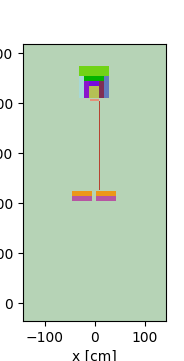

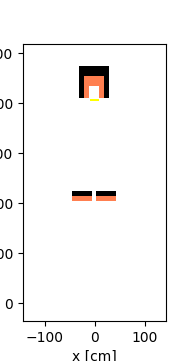

In [13]:
reg8900 = +sur8900 & -sur8901 & +sur8910 & -sur8911 & +sur8920 & -sur8921
cell8900 = openmc.Cell(
    region=reg8900, fill=He3, cell_id=8900
)  # Norberto lo tenía lleno con Air, puse He3
cell8901 = openmc.Cell(region=~reg8900, fill=Air, cell_id=8901)

# Beam-Catcher
reg8100 = +sur8100 & -sur8101 & +sur8111 & -sur8112 & +sur8121 & -sur8122
reg8101 = +sur8101 & -sur8102 & +sur8111 & -sur8112 & +sur8121 & -sur8122
reg8102 = +sur8102 & -sur8103 & +sur8113 & -sur8114 & +sur8123 & -sur8124
reg8103 = +sur8103 & -sur8104 & +sur8115 & -sur8116 & +sur8125 & -sur8126

reg8111 = +sur8100 & -sur8102 & -sur8111 & +sur8113 & +sur8121 & -sur8122
reg8112 = +sur8100 & -sur8102 & +sur8112 & -sur8114 & +sur8121 & -sur8122
reg8113 = +sur8100 & -sur8103 & -sur8113 & +sur8115 & +sur8123 & -sur8124
reg8114 = +sur8100 & -sur8103 & +sur8114 & -sur8116 & +sur8123 & -sur8124

reg8121 = +sur8100 & -sur8102 & +sur8113 & -sur8114 & -sur8121 & +sur8123
reg8122 = +sur8100 & -sur8102 & +sur8113 & -sur8114 & +sur8122 & -sur8124
reg8123 = +sur8100 & -sur8103 & +sur8115 & -sur8116 & -sur8123 & +sur8125
reg8124 = +sur8100 & -sur8103 & +sur8115 & -sur8116 & +sur8124 & -sur8126

reg8130 = -sur8100 | +sur8104 | -sur8115 | +sur8116 | -sur8125 | +sur8126

if BEAMCATCHER != False:
    cell8100 = openmc.Cell(region=reg8100, fill=Air, cell_id=8100)
    cell8101 = openmc.Cell(region=reg8101, fill=Polyborated, cell_id=8101)
    cell8102 = openmc.Cell(region=reg8102, fill=Polyborated, cell_id=8102)
    cell8103 = openmc.Cell(region=reg8103, fill=Lead, cell_id=8103)

    cell8111 = openmc.Cell(region=reg8111, fill=Polyborated, cell_id=8111)
    cell8112 = openmc.Cell(region=reg8112, fill=Polyborated, cell_id=8112)
    cell8113 = openmc.Cell(region=reg8113, fill=Lead, cell_id=8113)
    cell8114 = openmc.Cell(region=reg8114, fill=Lead, cell_id=8114)

    cell8121 = openmc.Cell(region=reg8121, fill=Polyborated, cell_id=8121)
    cell8122 = openmc.Cell(region=reg8122, fill=Polyborated, cell_id=8122)
    cell8123 = openmc.Cell(region=reg8123, fill=Lead, cell_id=8123)
    cell8124 = openmc.Cell(region=reg8124, fill=Lead, cell_id=8124)

    cell8130 = openmc.Cell(region=reg8130 & ~reg8900, fill=Air, cell_id=8130)
else:
    cell8100 = openmc.Cell(region=reg8100, fill=Air, cell_id=8100)
    cell8101 = openmc.Cell(region=reg8101, fill=Air, cell_id=8101)
    cell8102 = openmc.Cell(region=reg8102, fill=Air, cell_id=8102)
    cell8103 = openmc.Cell(region=reg8103, fill=Air, cell_id=8103)

    cell8111 = openmc.Cell(region=reg8111, fill=Air, cell_id=8111)
    cell8112 = openmc.Cell(region=reg8112, fill=Air, cell_id=8112)
    cell8113 = openmc.Cell(region=reg8113, fill=Air, cell_id=8113)
    cell8114 = openmc.Cell(region=reg8114, fill=Air, cell_id=8114)

    cell8121 = openmc.Cell(region=reg8121, fill=Air, cell_id=8121)
    cell8122 = openmc.Cell(region=reg8122, fill=Air, cell_id=8122)
    cell8123 = openmc.Cell(region=reg8123, fill=Air, cell_id=8123)
    cell8124 = openmc.Cell(region=reg8124, fill=Air, cell_id=8124)

    cell8130 = openmc.Cell(region=reg8130 & ~reg8900, fill=Air, cell_id=8130)

# Blindajes
reg8201 = +sur8200 & -sur8201 & +sur8211 & -sur8212 & +sur8221 & -sur8222
reg8202 = +sur8200 & -sur8201 & +sur8213 & -sur8214 & +sur8223 & -sur8224
reg8211 = +sur8201 & -sur8202 & +sur8211 & -sur8212 & +sur8221 & -sur8222
reg8212 = +sur8201 & -sur8202 & +sur8213 & -sur8214 & +sur8223 & -sur8224
reg8230 = reg8201 | reg8211 | ~(reg8202 | reg8212)

reg8301 = +sur8300 & -sur8301 & +sur8311 & -sur8312 & +sur8321 & -sur8322
reg8302 = +sur8300 & -sur8301 & +sur8313 & -sur8314 & +sur8323 & -sur8324
reg8330 = reg8301 | ~reg8302

# Slits que reproducen la apertura del chopper de Cadmio (se activa o desactiva desde FLAGS al inicio del Notebook)
if SLITS:
    cell8301 = openmc.Cell(region=~reg8301 & reg8302, fill=Cadmium, cell_id=8301)
else:
    cell8301 = openmc.Cell(region=~reg8301 & reg8302, fill=Air, cell_id=8301)

if SHIELDING:
    cell8201 = openmc.Cell(region=~reg8201 & reg8202, fill=Polyborated, cell_id=8201)
    cell8202 = openmc.Cell(region=~reg8211 & reg8212, fill=Lead, cell_id=8202)
else:
    cell8201 = openmc.Cell(region=~reg8201 & reg8202, fill=Air, cell_id=8201)
    cell8202 = openmc.Cell(region=~reg8211 & reg8212, fill=Air, cell_id=8202)

# Caja contenedora del haz
reg8401 = +sur8400 & -sur8401 & +sur8411 & -sur8412 & +sur8421 & -sur8422
reg8402 = +sur8400 & -sur8401 & +sur8413 & -sur8414 & +sur8423 & -sur8424
reg8430 = reg8401 | ~reg8402

if ALBOX:
    cell8401 = openmc.Cell(region=~reg8401 & reg8402, fill=Al6061, cell_id=8401)
else:
    cell8401 = openmc.Cell(region=~reg8401 & reg8402, fill=Air, cell_id=8401)


cell8999 = openmc.Cell(
    region=reg8430 & reg8330 & reg8230 & reg8130 & ~reg8900, fill=Air, cell_id=8999
)

u8100 = openmc.Universe(
    cells=[
        cell8100,
        cell8101,
        cell8102,
        cell8103,
        cell8111,
        cell8112,
        cell8113,
        cell8114,
        cell8121,
        cell8122,
        cell8123,
        cell8124,
        cell8201,
        cell8202,
        cell8301,
        cell8401,
        cell8900,
        cell8999,
    ],
    universe_id=8100,
)

%matplotlib widget
plot_args = {
    "origin": (0, (Louter + Linner) * 0.5, 0),
    "width": (
        130 * 2 * 1.1,
        (Louter - Linner) * 1.1,
    ),
    "color_by": "cell",
    "colors": materials_colors,
    "basis": "xy",
}
u8100.plot(**plot_args)
# plt.show()
plot_args = {
    "origin": (0, (Louter + Linner) * 0.5, 0),
    "width": (
        130 * 2 * 1.1,
        (Louter - Linner) * 1.1,
    ),
    "color_by": "material",
    "colors": materials_colors,
    "basis": "xy",
}
u8100.plot(**plot_args)
# plt.show()

## DELIMITADOR

### Interior delimitador (Cónico+Filtro Bismuto)

In [14]:
# reg7030=(-sur7030|-sur7031|(+sur7032&-sur7033&+sur7034&-sur7035))&+sur7010&-sur7020
# cell7030=openmc.Cell(region=reg7030,fill=Air,cell_id=7030)
reg7030 = -sur7030 & +sur7010 & -sur7011
reg7031 = -sur7031 & +sur7011 & -sur7012
reg7032 = -sur7032 & +sur7012 & -sur7013
reg7033 = -sur7033 & +sur7013 & -sur7014
reg7034 = -sur7034 & +sur7014 & -sur7015
reg7035 = -sur7035 & +sur7015 & -sur7016
reg7036 = -sur7036 & +sur7016 & -sur7017
reg7037 = -sur7037 & +sur7017 & -sur7018
reg7038 = -sur7038 & +sur7018 & -sur7019
reg7039 = -sur7039 & +sur7019 & -sur7020


if BISMUTO:
    cell7030 = openmc.Cell(region=reg7030, fill=Bi, cell_id=7030)
    cell7031 = openmc.Cell(region=reg7031, fill=Bi, cell_id=7031)
    cell7032 = openmc.Cell(region=reg7032, fill=Air, cell_id=7032)
    cell7033 = openmc.Cell(region=reg7033, fill=Air, cell_id=7033)
    cell7034 = openmc.Cell(region=reg7034, fill=Air, cell_id=7034)
    cell7035 = openmc.Cell(region=reg7035, fill=Air, cell_id=7035)
    cell7036 = openmc.Cell(region=reg7036, fill=Air, cell_id=7036)
    cell7037 = openmc.Cell(region=reg7037, fill=Air, cell_id=7037)
    cell7038 = openmc.Cell(region=reg7038, fill=Air, cell_id=7038)
    cell7039 = openmc.Cell(region=reg7039, fill=Air, cell_id=7039)
else:
    cell7030 = openmc.Cell(region=reg7030, fill=Air, cell_id=7030)
    cell7031 = openmc.Cell(region=reg7031, fill=Air, cell_id=7031)
    cell7032 = openmc.Cell(region=reg7032, fill=Air, cell_id=7032)
    cell7033 = openmc.Cell(region=reg7033, fill=Air, cell_id=7033)
    cell7034 = openmc.Cell(region=reg7034, fill=Air, cell_id=7034)
    cell7035 = openmc.Cell(region=reg7035, fill=Air, cell_id=7035)
    cell7036 = openmc.Cell(region=reg7036, fill=Air, cell_id=7036)
    cell7037 = openmc.Cell(region=reg7037, fill=Air, cell_id=7037)
    cell7038 = openmc.Cell(region=reg7038, fill=Air, cell_id=7038)
    cell7039 = openmc.Cell(region=reg7039, fill=Air, cell_id=7039)

if BLOQUEADO:
    reg7010 = -sur7000 & +sur7010 & -sur7011
    reg7011 = -sur7000 & +sur7011 & -sur7012
    reg7012 = -sur7000 & +sur7012 & -sur7013
    reg7013 = -sur7000 & +sur7013 & -sur7014
    reg7014 = -sur7000 & +sur7014 & -sur7015
    reg7015 = -sur7000 & +sur7015 & -sur7016
    reg7016 = -sur7000 & +sur7016 & -sur7017
    reg7017 = -sur7000 & +sur7017 & -sur7018
    reg7018 = -sur7000 & +sur7018 & -sur7019
    reg7019 = -sur7000 & +sur7019 & -sur7020
else:
    reg7010 = -sur7000 & +sur7010 & -sur7011 & ~reg7030
    reg7011 = -sur7000 & +sur7011 & -sur7012 & ~reg7031
    reg7012 = -sur7000 & +sur7012 & -sur7013 & ~reg7032
    reg7013 = -sur7000 & +sur7013 & -sur7014 & ~reg7033
    reg7014 = -sur7000 & +sur7014 & -sur7015 & ~reg7034
    reg7015 = -sur7000 & +sur7015 & -sur7016 & ~reg7035
    reg7016 = -sur7000 & +sur7016 & -sur7017 & ~reg7036
    reg7017 = -sur7000 & +sur7017 & -sur7018 & ~reg7037
    reg7018 = -sur7000 & +sur7018 & -sur7019 & ~reg7038
    reg7019 = -sur7000 & +sur7019 & -sur7020 & ~reg7039

# Piezas delimitador
cell7010 = openmc.Cell(region=reg7010, fill=Polyborated, cell_id=7010)
cell7012 = openmc.Cell(region=reg7012, fill=Polyborated, cell_id=7012)
cell7014 = openmc.Cell(region=reg7014, fill=Polyborated, cell_id=7014)
cell7016 = openmc.Cell(region=reg7016, fill=Polyborated, cell_id=7016)
cell7018 = openmc.Cell(region=reg7018, fill=Polyborated, cell_id=7018)

cell7011 = openmc.Cell(region=reg7011, fill=Lead, cell_id=7011)
cell7013 = openmc.Cell(region=reg7013, fill=Lead, cell_id=7013)
cell7015 = openmc.Cell(region=reg7015, fill=Lead, cell_id=7015)
cell7017 = openmc.Cell(region=reg7017, fill=Lead, cell_id=7017)
cell7019 = openmc.Cell(region=reg7019, fill=Lead, cell_id=7019)

# Exterior piezas
reg7000 = +sur7000 | -sur7010 | +sur7020
cell7000 = openmc.Cell(region=reg7000, fill=Air, cell_id=7000)

if BLOQUEADO:
    u7000 = openmc.Universe(
        cells=[
            cell7000,
            cell7010,
            cell7011,
            cell7012,
            cell7013,
            cell7014,
            cell7015,
            cell7016,
            cell7017,
            cell7018,
            cell7019,
        ],
        universe_id=7000,
    )
else:
    u7000 = openmc.Universe(
        cells=[
            cell7000,
            cell7010,
            cell7011,
            cell7012,
            cell7013,
            cell7014,
            cell7015,
            cell7016,
            cell7017,
            cell7018,
            cell7019,
            cell7030,
            cell7031,
            cell7032,
            cell7033,
            cell7034,
            cell7035,
            cell7036,
            cell7037,
            cell7038,
            cell7039,
        ],
        universe_id=7000,
    )

In [15]:
reg6000 = +sur6001 & -sur6002 & -sur6003
cell6000 = openmc.Cell(region=reg6000, fill=u7000, cell_id=6000)

# Tubo delimitador
reg6001 = (+sur6001 & -sur6002 & +sur6003 & -sur6004) | (+sur6000 & -sur6001 & -sur6004)
cell6001 = openmc.Cell(region=reg6001, fill=Al6061, cell_id=6001)

# Exterior delimitador
reg6002 = -sur6000 | +sur6002 | +sur6004
cell6002 = openmc.Cell(region=reg6002, fill=Air, cell_id=6002)

u6000 = openmc.Universe(cells=[cell6000, cell6001, cell6002], universe_id=6000)

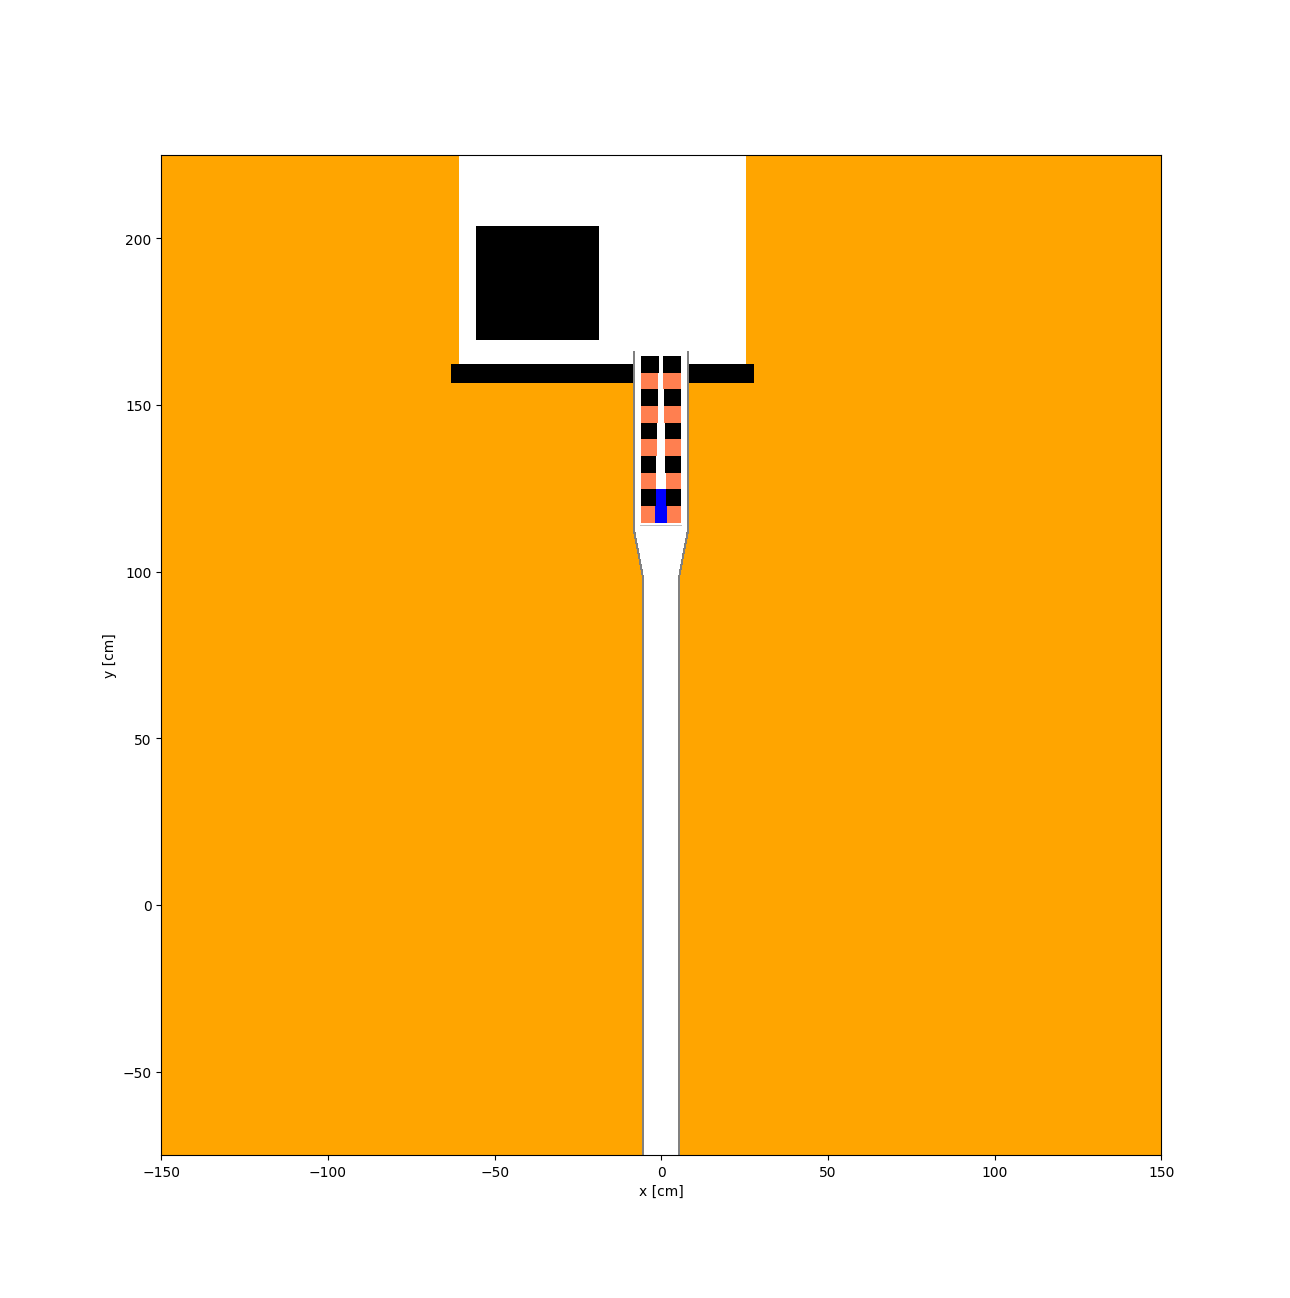

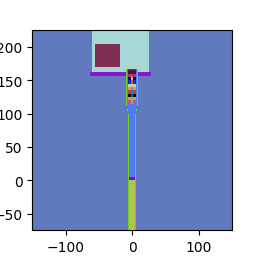

In [16]:
# Interior Conducto
reg5000 = -sur5000 & -sur5004
cell5000 = openmc.Cell(region=reg5000, fill=Air, cell_id=5000)

reg5001 = +sur5000 & -sur5010 & -sur5004
cell5001 = openmc.Cell(region=reg5001, fill=Air, cell_id=5001)


reg5002 = (
    (+sur5010 & -sur5001 & -sur5004)
    | (+sur5001 & -sur5002 & -sur5006)
    | (+sur5002 & -sur5003 & -sur5008)
)
cell5002 = openmc.Cell(region=reg5002, fill=u6000, cell_id=5002)
# cell5000=openmc.Cell(region=reg5000,fill=Air,cell_id=5000)

# Conducto
reg5003 = (
    (-sur5000 & +sur5004 & -sur5005)
    | (+sur5000 & -sur5001 & +sur5004 & -sur5005)
    | (+sur5001 & -sur5002 & +sur5006 & -sur5007)
    | (+sur5002 & -sur5003 & +sur5008 & -sur5009)
)
cell5003 = openmc.Cell(region=reg5003, fill=SS316L, cell_id=5003)

# Concreto externo
reg5004 = (
    (-sur5000 & +sur5005)
    | (+sur5000 & -sur5001 & +sur5005)
    | (+sur5001 & -sur5002 & +sur5007)
    | (+sur5002 & -sur5014 & +sur5009)
    | (+sur5014 & -sur5003 & +sur5009)
    | (+sur5003)
)

# Shutter
reg5005 = +sur5030 & -sur5031 & +sur5032 & -sur5033 & +sur5034 & -sur5035

# Caja del conducto
reg5006 = (+sur5020 & -sur5021 & +sur5022 & -sur5023) & (
    (+sur5003) | (+sur5014 & -sur5003 & +sur5009)
)


# Blindaje interno
reg5010 = +sur5011 & -sur5012 & +sur5013 & -sur5014 & +sur5015 & -sur5016

cell5004 = openmc.Cell(region=reg5010 & reg5004, fill=Lead, cell_id=5004)
cell5005 = openmc.Cell(region=reg5005 & reg5004, fill=Lead, cell_id=5005)
cell5006 = openmc.Cell(region=reg5006 & reg5004 & ~reg5005, fill=Air, cell_id=5006)
cell5007 = openmc.Cell(
    region=reg5004 & ~reg5010 & ~reg5006, fill=Concrete, cell_id=5007
)

# cell5006=openmc.Cell(region=+sur5003,fill=Air,cell_id=5006)

u5000 = openmc.Universe(
    cells=[
        cell5000,
        cell5001,
        cell5002,
        cell5003,
        cell5004,
        cell5005,
        cell5006,
        cell5007,
    ],
    universe_id=5000,
)
%matplotlib widget
u5000.plot(
    origin=(0.0, 75, 0.0),
    width=(300,300),
    pixels=(1000, 1000),
    basis='xy',
    color_by='material',
    colors=materials_colors
)
plt.show()
u5000.plot(
    origin=(0.0, 75, 0.0),
    width=(300,300),
    pixels=(200, 200),
    basis='xy',
    color_by='cell'
)
plt.show()

### Acá hay una rotación en x de 90 grados. Ahora la dirección de propagación es "z" y no "y"

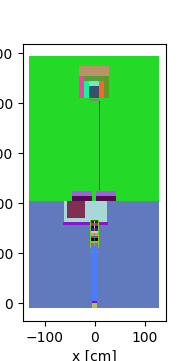

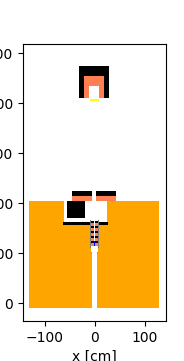

In [17]:
# Conducto N5
reg9003 = +sur9012 & -sur9013 & +sur9014 & -sur9015 & +sur9016 & -sur9017
cell9003 = openmc.Cell(region=reg9003, fill=u5000, cell_id=9003)
cell9003.rotation = (90, 0, 0)
# cell9003.translation=(-15.00,120.80,0.00)

# Afuera
reg9099 = +sur9012 & -sur9013 & +sur9015 & -sur9018 & +sur9016 & -sur9017

cell9099 = openmc.Cell(region=reg9099, fill=u8100, cell_id=9099)

cell9099.rotation = (90, 0, 0)  # rotación!!!!!!!!!!!


u9000 = openmc.Universe(cells=[cell9003, cell9099], universe_id=9000)

plot_args = {'origin':(0,0,(Louter+Linner)*0.5),
             'width': (130*2*1.1, (Louter-Linner)*1.1),
             'color_by':'cell',
             'colors':materials_colors,
             'basis':'xz'
            }
u9000.plot(**plot_args)
plt.show()
plot_args = {'origin':(0,0,(Louter+Linner)*0.5),
             'width': (130*2*1.1, (Louter-Linner)*1.1),
             'color_by':'material',
             'colors':materials_colors,
             'basis':'xz'
            }
u9000.plot(**plot_args)
plt.show()

### Esquema por celdas, vista superior

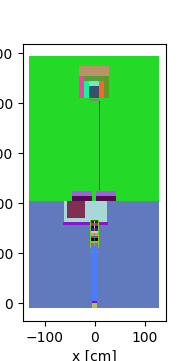

In [18]:
plt.rcParams["figure.figsize"] = 10, 10
plot_args = {
    "origin": (0, 0, (Louter + Linner) * 0.5),
    "width": (130 * 2 * 1.1, (Louter - Linner) * 1.1),
    "color_by": "cell",
    "colors": materials_colors,
    "basis": "xz",
}
u9000.plot(**plot_args)
plt.show()

## Esquema por materiales, vista superior

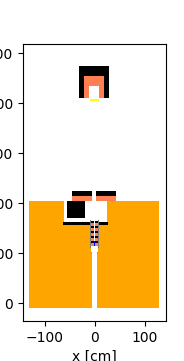

In [19]:
plot_args = {
    "origin": (0, 0, (Louter + Linner) * 0.5),
    "width": (130 * 2 * 1.1, (Louter - Linner) * 1.1),
    "color_by": "material",
    "colors": materials_colors,
    "basis": "xz",
}
u9000.plot(**plot_args)
plt.show()

## Esquema por celdas, vista lateral

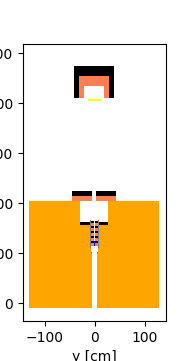

In [20]:
plot_args = {
    "origin": (0, 0, (Louter + Linner) * 0.5),
    "width": (130 * 2 * 1.1, (Louter - Linner) * 1.1),
    "color_by": "material",
    "colors": materials_colors,
    "basis": "yz",
}
u9000.plot(**plot_args)
plt.show()

### Detalle colimador

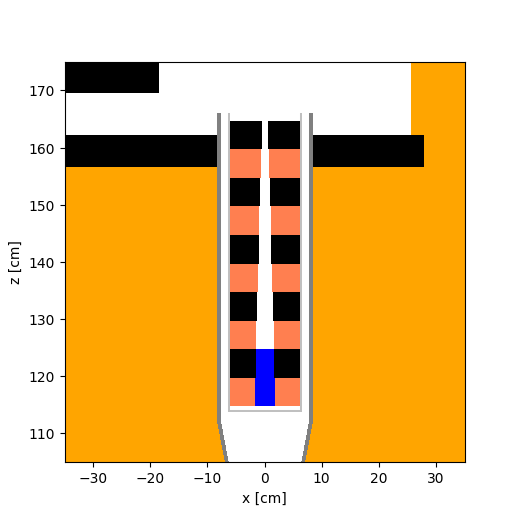

In [21]:
%matplotlib widget
plot_args = {
    "origin": (0, 0, 140),
    "width": (70, 70),
    "color_by": "material",
    "colors": materials_colors,
    "basis": "xz",
    "pixels": (400, 400),
}
u9000.plot(**plot_args)
plt.show()

### Detalle diafragma de salida (chopper)

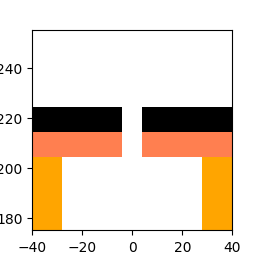

In [22]:
plot_args = {
    "origin": (0, 0, 215),
    "width": (80, 80),
    "color_by": "material",
    "colors": materials_colors,
    "basis": "yz",
    "pixels": (200, 200),
}
u9000.plot(**plot_args)
plt.show()

### Borra archivos anteriores y guarda Statepoints

In [23]:
#!mv statepoint.*.h5 ../Statepoints/
#!rm *.xml
#!rm *.out

In [24]:
openmc_exe = "openmc"
# openmc_data="/home/vissffin/openmc/data/endfb-viii.0-hdf5/cross_sections.xml"

geome = openmc.Geometry(u9000)
geome.export_to_xml()
mats = openmc.Materials(geome.get_all_materials().values())
# mats.cross_sections = openmc_data #Agregué una línea al .bashrc y ya no necesito definir las secciones eficaces en el Notebook
mats.export_to_xml()

### Esto genera un xml con la configuración para plotear mejor la geometría. Si desmuteo la ultima línea, plotea

In [25]:
#!rm *.ppm
plot_xz = openmc.Plot()
plot_xz.id = 3
plot_xz.basis = "xz"
plot_xz.origin = (0.0, 0.0, (Louter + Linner) * 0.5)
plot_xz.width = (130 * 2.0, Louter - Linner)
plot_xz.pixels = (2600, 5042)
plot_xz.color_by = "material"
plot_xz.colors = materials_colors

plot_yz = openmc.Plot()
plot_yz.id = 4
plot_yz.basis = "yz"
plot_yz.origin = (0.0, 0.0, (Louter + Linner) * 0.5)
plot_yz.width = (130 * 2.0, Louter - Linner)
plot_yz.pixels = (2600, 5042)
plot_yz.color_by = "material"
plot_yz.colors = materials_colors

plots = openmc.Plots([plot_xz, plot_yz])
plots.export_to_xml()
openmc.plot_geometry()

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another PlotBase instance already exists with id=3.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another PlotBase instance already exists with id=4.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

## TALLIES

In [26]:
tallies = openmc.Tallies()

# Filtro de grilla
mesh_xz = openmc.RegularMesh(mesh_id=1)
mesh_xz.lower_left = [-130, -3.1 / 2, Linner]
mesh_xz.upper_right = [130, 3.1 / 2, Louter]
mesh_xz.dimension = [1000, 1, 1000]
filter_mesh_xz = openmc.filter.MeshFilter(mesh_xz, filter_id=1)

mesh_yz = openmc.RegularMesh(mesh_id=2)
mesh_yz.lower_left = [-1.45 / 2, -130, Linner]
mesh_yz.upper_right = [1.45 / 2, 130, Louter]
mesh_yz.dimension = [1, 1000, 1000]
filter_mesh_yz = openmc.filter.MeshFilter(mesh_yz, filter_id=2)

mesh_xy = openmc.RegularMesh(mesh_id=3)
mesh_xy.lower_left = [-15, -15, Louter - 290]
mesh_xy.upper_right = [15, 15, Louter - 290 + 5]
mesh_xy.dimension = [1000, 1000, 1]
filter_mesh_xy = openmc.filter.MeshFilter(mesh_xy, filter_id=3)

mesh_surf = openmc.RegularMesh(mesh_id=4)
mesh_surf.lower_left = [-1.45 / 2, -3.1 / 2, L4int]
mesh_surf.upper_right = [1.45 / 2, 3.1 / 2, L6ext]
mesh_surf.dimension = [1, 1, 1]
filter_mesh_surf = openmc.filter.MeshSurfaceFilter(mesh_surf, filter_id=4)

# dummy del mesh del tally en el C5 que uso para "spectra_neutron"
mesh_surf_d = openmc.RegularMesh(mesh_id=14)
mesh_surf_d.lower_left = [-1.45 / 2, -3.1 / 2, L4int]
mesh_surf_d.upper_right = [1.45 / 2, 3.1 / 2, L6ext]
mesh_surf_d.dimension = [
    5,
    5,
    5,
]  # tuve que aumentar la dimensión del mesh para poder plotearlo con openmc_regular_mesh_plotter
filter_mesh_surf_d = openmc.filter.MeshFilter(mesh_surf_d, filter_id=14)

# Filtro de particulas
neutron = openmc.ParticleFilter(["neutron"], filter_id=5)
photon = openmc.ParticleFilter(["photon"], filter_id=6)

# Filtro de dosis
##En_ARN,h10n_ARN=np.loadtxt('../h10ARN_neutron',unpack=True)
##Eg_ARN,h10g_ARN=np.loadtxt('../h10ARN_photon',unpack=True)

##filter_dose_neutron=openmc.filter.EnergyFunctionFilter(En_ARN,h10n_ARN,filter_id=7)
##filter_dose_photon=openmc.filter.EnergyFunctionFilter(Eg_ARN,h10g_ARN,filter_id=8)

# Filtro de energías
filter_energy_neutron = openmc.filter.EnergyFilter(
    np.logspace(np.log10(1e-5), np.log10(2e7), 201), filter_id=9
)
filter_energy_photon = openmc.filter.EnergyFilter(np.linspace(0, 2e7, 201), filter_id=10)

# Filtro de celdas
filter_surf = openmc.filter.SurfaceFilter([sur5003], filter_id=11)
filter_cell = openmc.filter.CellFilter([cell5001], filter_id=12)
filter_detector = openmc.filter.CellFilter([cell8900], filter_id=13)

# Tallies
##dose_neutron_xy = openmc.Tally(name='dose_neutron_xy',tally_id=1)
##dose_neutron_xy.scores = ["flux"]
##dose_neutron_xy.filters = [filter_mesh_xy,filter_dose_neutron,neutron]
##tallies.append(dose_neutron_xy)

##dose_photon_xy = openmc.Tally(name='dose_photon_xy',tally_id=2)
##dose_photon_xy.scores = ["flux"]
##dose_photon_xy.filters = [filter_mesh_xy,filter_dose_photon,photon]
##tallies.append(dose_photon_xy)

flux_neutron_xy = openmc.Tally(name="flux_neutron_xy", tally_id=3)
flux_neutron_xy.scores = ["flux"]
flux_neutron_xy.filters = [filter_mesh_xy, neutron]
tallies.append(flux_neutron_xy)

flux_photon_xy = openmc.Tally(name="flux_photon_xy", tally_id=4)
flux_photon_xy.scores = ["flux"]
flux_photon_xy.filters = [filter_mesh_xy, photon]
tallies.append(flux_photon_xy)

##dose_neutron_xz = openmc.Tally(name='dose_neutron_xz',tally_id=5)
##dose_neutron_xz.scores = ["flux"]
##dose_neutron_xz.filters = [filter_mesh_xz,filter_dose_neutron,neutron]
##tallies.append(dose_neutron_xz)

##dose_photon_xz = openmc.Tally(name='dose_photon_xz',tally_id=6)
##dose_photon_xz.scores = ["flux"]
##dose_photon_xz.filters = [filter_mesh_xz,filter_dose_photon,photon]
##tallies.append(dose_photon_xz)

flux_neutron_xz = openmc.Tally(name="flux_neutron_xz", tally_id=7)
flux_neutron_xz.scores = ["flux"]
flux_neutron_xz.filters = [filter_mesh_xz, neutron]
tallies.append(flux_neutron_xz)

flux_photon_xz = openmc.Tally(name="flux_photon_xz", tally_id=8)
flux_photon_xz.scores = ["flux"]
flux_photon_xz.filters = [filter_mesh_xz, photon]
tallies.append(flux_photon_xz)

##dose_neutron_yz = openmc.Tally(name='dose_neutron_yz',tally_id=9)
##dose_neutron_yz.scores = ["flux"]
##dose_neutron_yz.filters = [filter_mesh_yz,filter_dose_neutron,neutron]
##tallies.append(dose_neutron_yz)

##dose_photon_yz = openmc.Tally(name='dose_photon_yz',tally_id=10)
##dose_photon_yz.scores = ["flux"]
##dose_photon_yz.filters = [filter_mesh_yz,filter_dose_photon,photon]
##tallies.append(dose_photon_yz)

flux_neutron_yz = openmc.Tally(name="flux_neutron_yz", tally_id=11)
flux_neutron_yz.scores = ["flux"]
flux_neutron_yz.filters = [filter_mesh_yz, neutron]
tallies.append(flux_neutron_yz)

flux_photon_yz = openmc.Tally(name="flux_photon_yz", tally_id=12)
flux_photon_yz.scores = ["flux"]
flux_photon_yz.filters = [filter_mesh_yz, photon]
tallies.append(flux_photon_yz)

spectra_neutron = openmc.Tally(name="spectra_neutron", tally_id=13)
spectra_neutron.scores = ["current"]
spectra_neutron.filters = [filter_energy_neutron, filter_mesh_surf, neutron]
tallies.append(spectra_neutron)

# dummy del tally de spectra_neutron para plotearlo junto con la geometría usando openmc_regular_mesh_plotter
spectra_neutron_d = openmc.Tally(name="spectra_neutron_d", tally_id=24)
spectra_neutron_d.scores = ["flux"]
spectra_neutron_d.filters = [
    filter_mesh_surf_d,
    neutron,
]  # remueve el energy filter porque no acepta más de 1 bin el openmc_regular_mesh_plotter
tallies.append(spectra_neutron_d)

spectra_photon = openmc.Tally(name="spectra_photon", tally_id=14)
spectra_photon.scores = ["current"]
spectra_photon.filters = [filter_energy_photon, filter_mesh_surf, photon]
tallies.append(spectra_photon)

patron_neutron = openmc.Tally(name="patron_neutron", tally_id=15)
patron_neutron.scores = ["flux"]
patron_neutron.filters = [filter_energy_neutron, filter_cell, neutron]
tallies.append(patron_neutron)

patron_photon = openmc.Tally(name="patron_photon", tally_id=16)
patron_photon.scores = ["flux"]
patron_photon.filters = [filter_energy_photon, filter_cell, photon]
tallies.append(patron_photon)

# track_neutron=openmc.Tally(name='track_neutron',tally_id=19)
# track_neutron.scores=['track-surface']#no reconoce track-surface como un argumento para scores
# track_neutron.filters=[filter_surf,neutron]
# tallies.append(track_neutron)

# track_photon=openmc.Tally(name='track_photon',tally_id=20)
# track_photon.scores=['track-surface']#no reconoce track-surface como un argumento para scores
# track_photon.filters=[filter_surf,photon]
# tallies.append(track_photon)


detector_neutron = openmc.Tally(name="detector_neutron", tally_id=21)
# detector_neutron.scores=['flux']
detector_neutron.scores = [
    "absorption"
]  # lo cambio a absorción porque cambié el material Air por He3
detector_neutron.filters = [filter_energy_neutron, filter_detector, neutron]
tallies.append(detector_neutron)

detector_photon = openmc.Tally(name="detector_photon", tally_id=22)
detector_photon.scores = ["flux"]
detector_photon.filters = [filter_energy_photon, filter_detector, photon]
tallies.append(detector_photon)

detector_neutron_flux = openmc.Tally(name="detector_neutron_flux", tally_id=23)
detector_neutron_flux.scores=['flux']
detector_neutron_flux.filters = [filter_energy_neutron, filter_detector, neutron]
tallies.append(detector_neutron_flux)



# pongo un detector en la ultima celda del colimador==>cell7039
particle_filter = openmc.ParticleFilter(["neutron"])
energy_detector_tally = openmc.Tally(name="energy_detector_tally")
energy_filter = openmc.filter.EnergyFilter(
    np.logspace(np.log10(1e-5), np.log10(2e7), 201)
)
cell_filter = openmc.CellFilter(cell7039.id)
energy_detector_tally.scores = ["flux"]
energy_detector_tally.filters = [energy_filter, cell_filter, particle_filter]
tallies.append(energy_detector_tally)


tallies.export_to_xml()

# (array(mesh_xz.upper_right)-array(mesh_xz.lower_left))/mesh_xz.dimension

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=9.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5.
  warn(msg, IDWarning)


## RUN

In [27]:
import os, glob

openmc.config["cross_sections"] = (
    "/home/lucas/Documents/Proyecto_Integrador/endfb-viii.0-hdf5/cross_sections.xml"
)

settings = openmc.Settings()
settings.run_mode = "fixed source"

# Fuente de HistogramSource
source = openmc.HistogramSource(
    path="/home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile3/config3_copy/source.xml"
)
settings.source = source

settings.particles = int(1e6)
batches = 5200
statepoint = "statepoint.4500.h5"
# statepoint = None  # Cambiar a None para ejecutar la simulación desde cero
settings.batches = batches
settings.inactive = 0
settings.survival_biasing = True
# settings.photon_transport=True
# settings.output={'tallies':True,'summary':True}
# settings.sourcepoint={'write':True}
settings.export_to_xml()

# for file in glob.glob("statepoint.*.h5"):
#     os.remove(file)
# if os.path.exists("summary.h5"):
#     os.remove("summary.h5")

#!openmc -g
if statepoint is None:
    openmc.run()
else:
    openmc.run(restart_file=statepoint)
#!/home/norberto/openmc/build-debug/bin/openmc
#!/home/norberto/openmc-surftrack/build-openmc-Desktop-Default/bin/openmc -g
# model = openmc.Model(geome, mats, settings, tallies)
# sp_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

### Ploteo el tally dentro del colimador

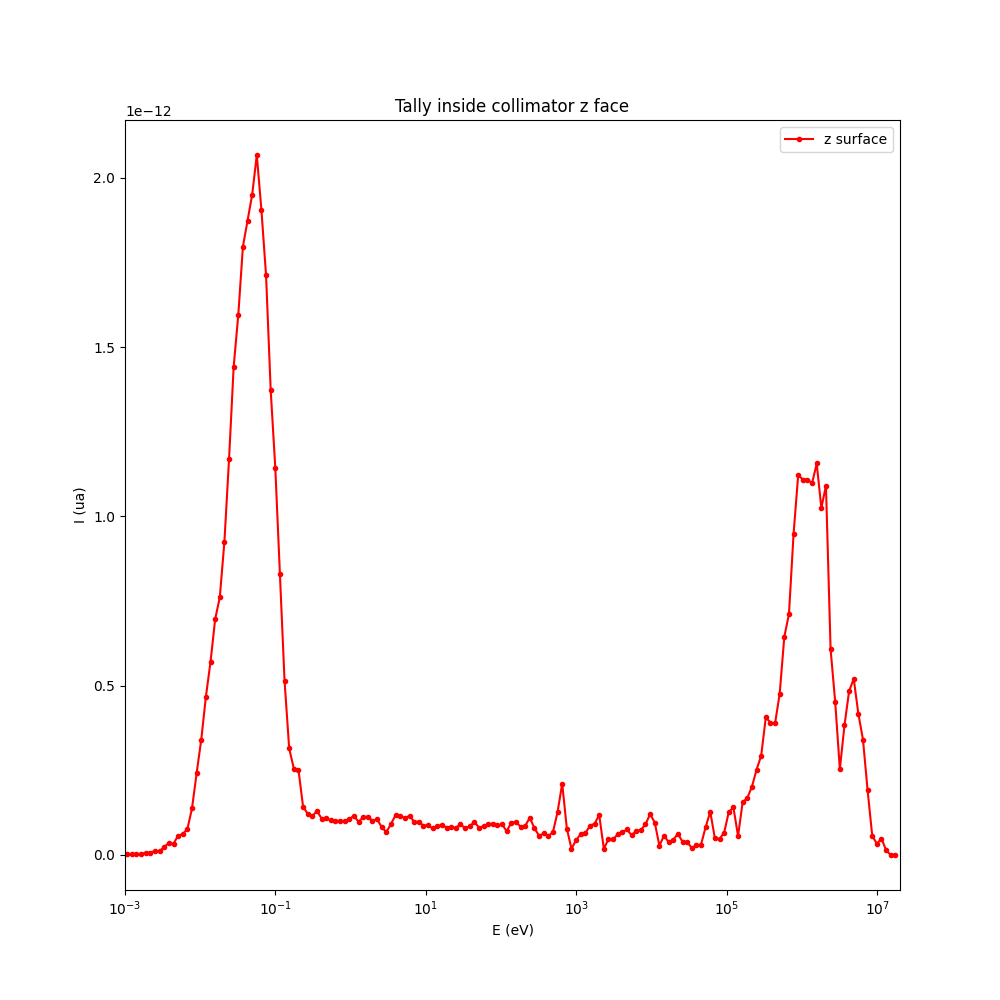

In [28]:
import openmc
import matplotlib.pyplot as plt
with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:
    # with openmc.StatePoint(sp_filename) as sp:
    energy_data = sp.get_tally(name="spectra_neutron")

df = energy_data.get_pandas_dataframe(nuclides=False)
# print(df)
df.columns = [
    "Emin",
    "Emax",
    "x",
    "y",
    "z",
    "surf",
    "particle",
    "score",
    "mean",
    "stdv",
]
# df.columns=['Emin','Emax','x','y','z','surf','particle','score','mean']

# print(df)
# df.to_csv('OpenMC_RA-6_C5_N16_espectro_neutrones.csv')
# display(df.to_string())

# df=df[df['surf']=='x-max in']#no entiendo que superficie es esta, pareciera una pared lateral del tally dentor del colimador
df = df[
    df["surf"] == "z-max out"
]  # esta debería ser la cara exterior de ese mismo tally
# print(df)
df.to_csv(
    "OpenMC_RA-6_C5_N16_Con_Bi_espectro_neutrones.csv",
    sep=",",
    columns=["Emin", "Emax", "mean", "stdv"],
    index=False,
    encoding="utf-8",
)  # exporta un CSV con el espectro a la salida del conducto pasante N5, antes del shutter de plomo
df.plot(
    x="Emin", y="mean", style="r.-", logx=True, logy=False, label="z surface"
)  # , ylim=[1E-10,10e0]
plt.legend()
plt.title("Tally inside collimator z face")
plt.xlabel("E (eV)")
plt.ylabel("I (ua)")
# plt.axvline(x=0.05, color="black")
plt.xlim(1e-3, 2e7)
plt.show()

### Ploteo el tally que puse a la salida del colimador, en la última celda

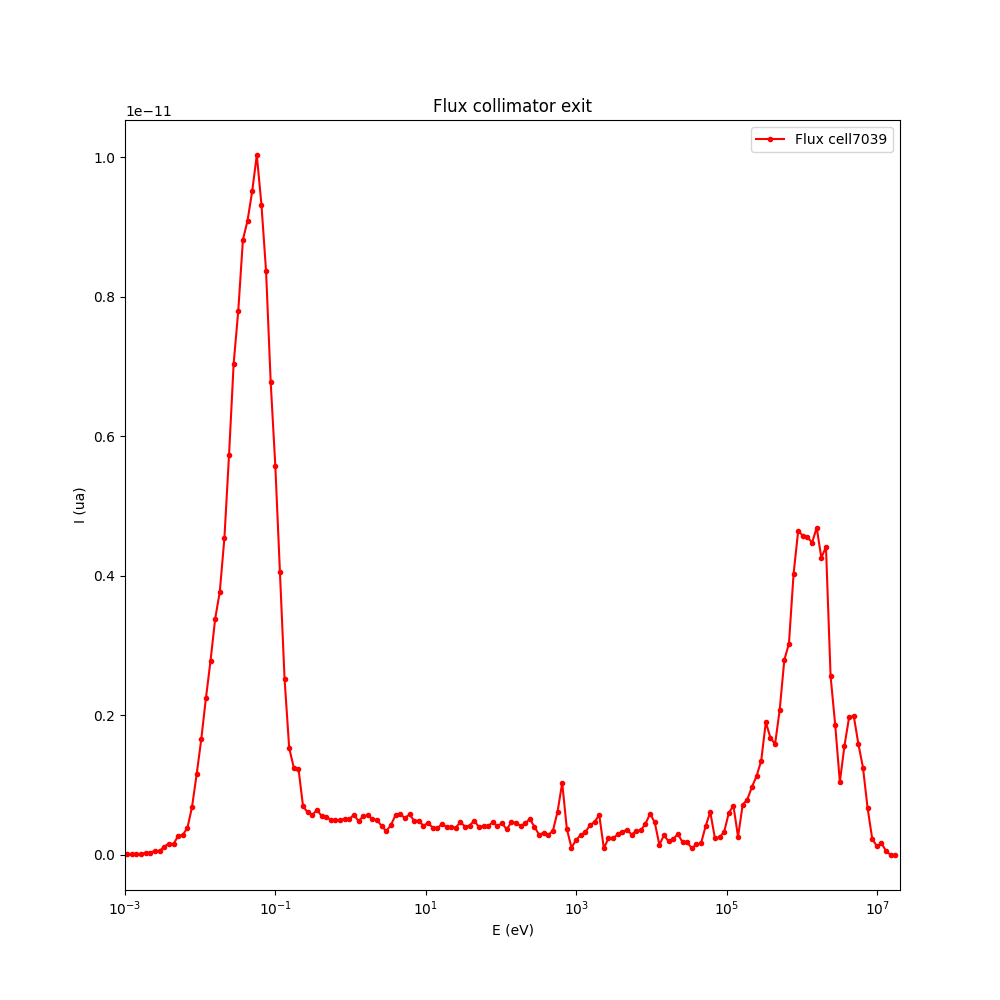

In [29]:
# with openmc.StatePoint(sp_filename) as sp:
with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:

    energy_data = sp.get_tally(name="energy_detector_tally")
  
df = energy_data.get_pandas_dataframe(nuclides=False)
#print(df)
#df.to_csv('E_det_'+ config +'.csv', sep=',', index=False, encoding='utf-8') 
df.columns=['Emin','Emax','cell','particle','score','mean','stdv']
#df.plot(x="Emin", y="mean",style='r.-',logx=True, logy=False, ylim=[1E-10,1e-1])
df.plot(x="Emin", y="mean",style='r.-',logx=True, logy=False, label= 'Flux cell7039')
plt.legend()
plt.title('Flux collimator exit')
plt.xlabel('E (eV)')
plt.ylabel('I (ua)')
plt.xlim(1e-3, 2e7)
plt.show()

### Ploteo el detector de 3He

In [1]:
batches = 5200

[0.10874906 0.0969227  0.08638245 0.07698844 0.06861602 0.06115409
 0.05450364 0.04857642 0.04329378 0.03858562 0.03438947 0.03064965
 0.02731653 0.02434588 0.02169829 0.01933862 0.01723557 0.01536121
 0.0136907  0.01220185 0.01087491 0.00969227 0.00863825 0.00769884
 0.0068616  0.00611541 0.00545036 0.00485764 0.00432938 0.00385856
 0.00343895 0.00306496 0.00273165 0.00243459 0.00216983 0.00193386
 0.00172356 0.00153612 0.00136907 0.00122018 0.00108749 0.00096923
 0.00086382 0.00076988 0.00068616 0.00061154 0.00054504 0.00048576
 0.00043294 0.00038586 0.00034389 0.0003065  0.00027317 0.00024346
 0.00021698 0.00019339 0.00017236 0.00015361 0.00013691]
59
59
0.9999999999999998
Factor de normalización: -2.0049065878230663e-11
1.0036326941805493


/tmp/ipykernel_389788/450918982.py:86: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_exp = pd.read_csv(


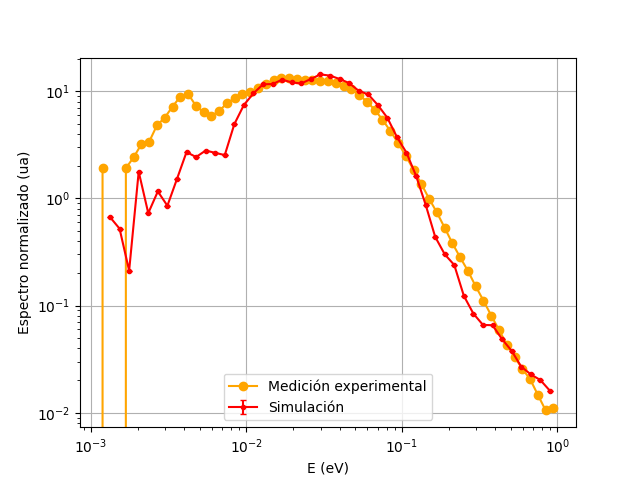

In [2]:
import pandas as pd
import numpy as np
import openmc
import matplotlib.pyplot as plt

plt.close()

# with openmc.StatePoint('statepoint.100.h5') as sp:
with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:
    # with openmc.StatePoint(sp_filename) as sp:
    energy_data = sp.get_tally(name="detector_neutron")
    # energy_data = sp.get_tally(name="detector_neutron_flux")

df = energy_data.get_pandas_dataframe(nuclides=False)
# print(df)

# df.columns=['Emin','Emax','x','y','z','surf','particle','score','mean','stdv']
df.columns = ["Emin", "Emax", "cell", "particle", "score", "mean", "stdv"]
df["Emed"] = (df["Emin"] + df["Emax"]) / 2
df["mean"] = df["mean"]  / (df["Emax"] - df["Emin"])  # normalizo por el ancho de bin
df["stdv"] = df["stdv"] / (df["Emax"] - df["Emin"])  # normalizo por el ancho de bin
# print(df)
# display(df.to_string())

def calcular_factor_normalizacion(df_tally, df_measured):
    """
    Calcula un factor de normalización entre dos espectros dados:
    - df_tally: espectro simulado (con columnas 'Emin', 'Emax', 'mean')
    - df_measured: espectro medido (con columnas 'Emed', 'mean')

    Returns:
        float: factor de normalización (area_tally / area_measured)
    """
    # --- Intervalo común ---
    Emin_common = df_measured["E_eV"].min()
    Emax_common = df_measured["E_eV"].max()

    # Filtrar al intervalo común
    df_tally_common = df_tally[(df_tally["Emin"] >= Emin_common) & (df_tally["Emax"] <= Emax_common)].copy()
    df_measured_common = df_measured[(df_measured["E_eV"] >= Emin_common) & (df_measured["E_eV"] <= Emax_common)].copy()

    # --- Área del espectro tally ---
    df_tally_common["delta_E"] = df_tally_common["Emax"] - df_tally_common["Emin"]
    area_tally = (df_tally_common["delta_E"] * df_tally_common["mean"]).sum()

    # --- Área del espectro medido ---
    emed_vals = df_measured_common["E_eV"].values
    mean_vals = df_measured_common["ESP"].values

    # Estimar bordes de energía
    E_edges = np.zeros(len(emed_vals) + 1)
    E_edges[1:-1] = (emed_vals[1:] + emed_vals[:-1]) / 2
    E_edges[0] = emed_vals[0] - (E_edges[1] - emed_vals[0])
    E_edges[-1] = emed_vals[-1] + (emed_vals[-1] - E_edges[-2])

    # Calcular ancho de bin
    delta_E = np.diff(E_edges)

    # Calcular área
    area_measured = np.sum(delta_E * mean_vals)

    # Factor de normalización
    factor = area_tally / area_measured

    return factor

valores_medios_log = [999.99999968, 891.25093819, 794.32823472, 707.94578446, 630.95734493,
 562.34132529, 501.18723354, 446.68359194, 398.1071702,  354.81338901,
 316.227766   , 281.83829319, 251.18864339, 223.87211407, 199.52623153,
 177.82794113, 158.48931954, 141.25375453, 125.89254121, 112.20184581,
 100.00000021,  89.12509382,  79.43282347,  70.79457845,  63.09573449,
  56.23413253,  50.11872335,  44.66835919,  39.81071702,  35.4813389,
  31.6227766,   28.18382932,  25.11886434,  22.38721141,  19.95262315,
  17.78279411,  15.84893195,  14.12537545,  12.58925412,  11.22018458,
  10.00000002,   8.91250938,   7.94328235,   7.07945784,   6.30957345,
   5.62341325,   5.01187234,   4.46683592,   3.9810717,    3.54813389,
   3.16227766,   2.81838293,   2.51188643,   2.23872114,   1.99526232,
   1.77827941,   1.5848932,    1.41253755,   1.25892541,   1.12201846]

for i in range(len(valores_medios_log)):
    valores_medios_log[i] = valores_medios_log[i] * 1e-3  # Convertir de meV a eV

ancho_bines = (np.array(valores_medios_log[:-1]) - np.array(valores_medios_log[1:]))
print(ancho_bines)

df_exp = pd.read_csv(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/procesamiento/espectro.DAT",
    delim_whitespace=True,
    comment="@",
    skiprows=3,
    skipfooter=3,  # Salta las últimas 3 filas
    header=None,
    names=["E_meV", "ESP", "ERR", "CANI", "CANS", "DCAN"],
    engine="python",
)
print(len(df_exp))
print(len(ancho_bines))
# Normalize the measured counts by the precomputed bin widths
total_counts = df_exp["ESP"].sum()
df_exp["ESP"] = df_exp["ESP"].to_numpy() / ancho_bines / total_counts  # Normaliza por el ancho de bin y el total de conteos

print(np.sum(df_exp["ESP"] * ancho_bines))  # Verifica que la suma sea 1


df_exp["E_eV"] = df_exp["E_meV"] / 1e3
factor = calcular_factor_normalizacion(df, df_exp)
print(f"Factor de normalización: {factor}")
%matplotlib widget
# df=df[df['surf']=='x-max in']
# df.to_csv('E_source.csv', sep=',', index=False, encoding='utf-8')
# df.plot(
#     x="Emed", y="mean", style="r.-", logx=True, logy=False, label="Absorption cell8900"
# )  # , ylim=[1E-10,10e0]

energia_minima_experimental = df_exp["E_eV"].min()
energia_maxima_experimental = df_exp["E_eV"].max()
df_recortado = df[(df["Emed"] >= energia_minima_experimental) & (df["Emed"] <= energia_maxima_experimental)].copy()
print(np.sum(-df_recortado["mean"] / factor* (df_recortado["Emax"] - df_recortado["Emin"])))

plt.errorbar(
    df_recortado["Emed"], -df_recortado["mean"] / factor, yerr=df_recortado["stdv"],
    fmt="r.-", label="Simulación", capsize=2
)
# plt.plot(
#     df_exp["E_eV"],
#     df_exp["ESP"]*4.533e-12,
#     "b-",
#     label="Medición experimental - factor por maximo",
# )  # , ylim=[1E-10,10e0]
plt.plot(
    df_exp["E_eV"],
    df_exp["ESP"],
    "orange",
    label="Medición experimental",
    marker="o",
)  # , ylim=[1E-10,10e0]
plt.legend()
plt.yscale("log")
plt.xscale("log")
# plt.title("Absorption 3He detector")
plt.xlabel("E (eV)")
plt.ylabel("Espectro normalizado (ua)")
plt.grid(True)
plt.show()

/tmp/ipykernel_96328/1126439751.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_exp = pd.read_csv(


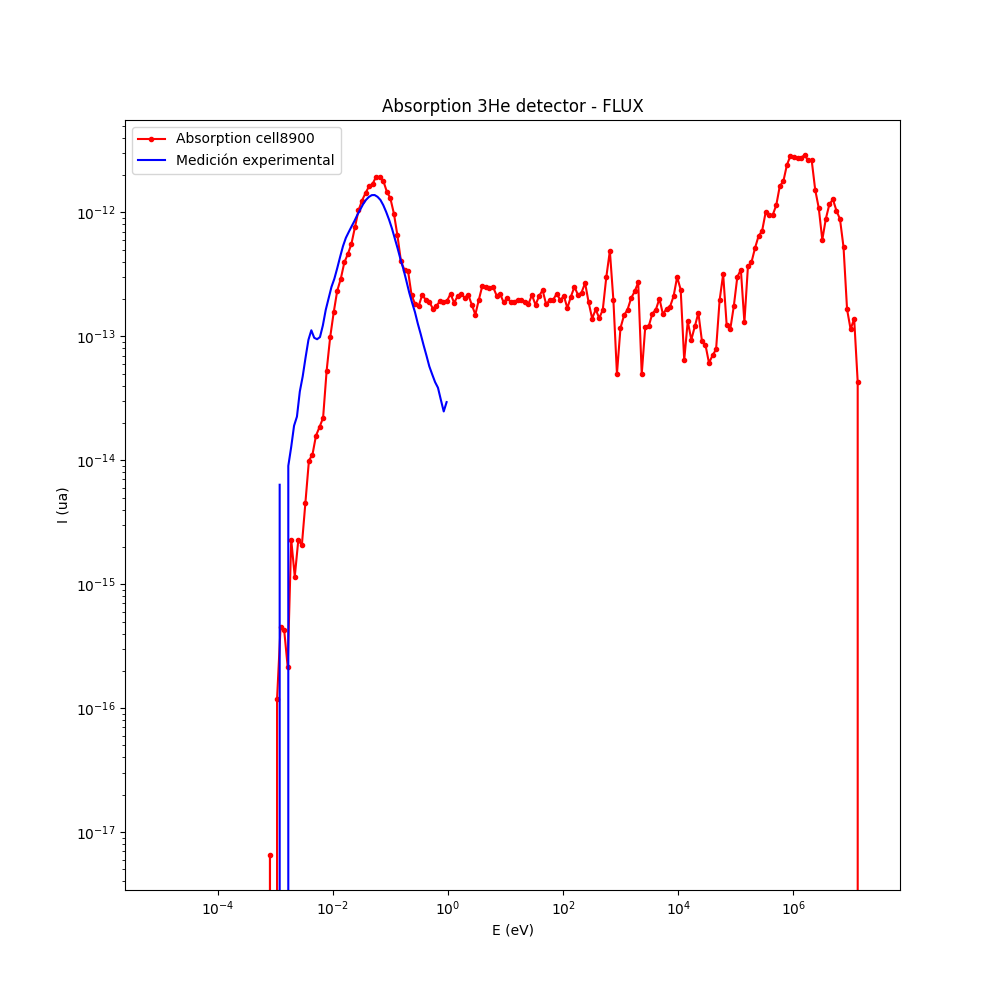

In [32]:
# with openmc.StatePoint('statepoint.100.h5') as sp:
with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:
    # with openmc.StatePoint(sp_filename) as sp:
    energy_data = sp.get_tally(name="detector_neutron_flux")

df = energy_data.get_pandas_dataframe(nuclides=False)
# print(df)

# df.columns=['Emin','Emax','x','y','z','surf','particle','score','mean','stdv']
df.columns = ["Emin", "Emax", "cell", "particle", "score", "mean", "stdv"]
# print(df)
# display(df.to_string())
import pandas as pd

df_exp = pd.read_csv(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/procesamiento/espectro.DAT",
    delim_whitespace=True,
    comment="@",
    skiprows=3,
    skipfooter=3,  # Salta las últimas 3 filas
    header=None,
    names=["E_meV", "ESP", "ERR", "CANI", "CANS", "DCAN"],
    engine="python",
)
df_exp["E_eV"] = df_exp["E_meV"] / 1e3

# df=df[df['surf']=='x-max in']
# df.to_csv('E_source.csv', sep=',', index=False, encoding='utf-8')
df.plot(
    x="Emin", y="mean", style="r.-", logx=True, logy=False, label="Absorption cell8900"
)  # , ylim=[1E-10,10e0]
plt.plot(
    df_exp["E_eV"],
    df_exp["ESP"]*4.533e-12,
    "b-",
    label="Medición experimental",
)  # , ylim=[1E-10,10e0]
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.title("Absorption 3He detector - FLUX")
plt.xlabel("E (eV)")
plt.ylabel("I (ua)")
plt.show()

# Ploteo los flujos

# XZ

/tmp/ipykernel_389788/96502365.py:25: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax.contourf(x, z, grid_flux, cmap='viridis', norm=mcolors.LogNorm(), zorder=1.1,alpha=0.8)


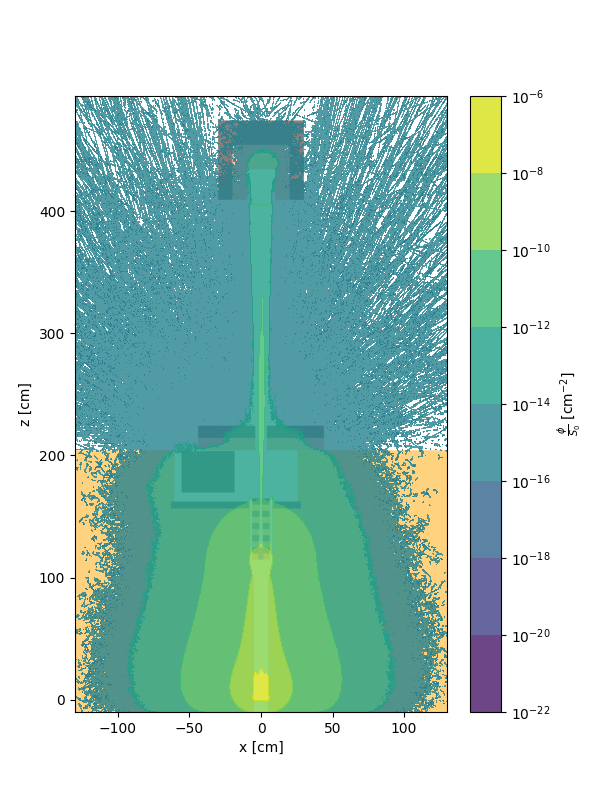

In [5]:
# python
import numpy as np
import openmc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:
    flux_xz = sp.get_tally(name="flux_neutron_xz")

vals_flux = flux_xz.get_values()
vals_flux = vals_flux / 0.4063852 # Volumen de la celda en cm3
grid_flux = vals_flux.reshape(1000, 1000)

x, z = np.meshgrid(np.linspace(-130, 130, 1000), np.linspace(-10, 494.2, 1000))

fig, ax = plt.subplots(figsize=(6, 8))

# Cargar la imagen de fondo
img = mpimg.imread("plot_3.png")
# Ajusta extent para que la imagen cubra el mismo rango que tus datos
ax.imshow(img,extent=[-130, 130, -10, 494.2], aspect='auto', alpha=0.5, zorder=1)

# Graficar el contour encima
contour = ax.contourf(x, z, grid_flux, cmap='viridis', norm=mcolors.LogNorm(), zorder=1.1,alpha=0.8)
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label(r"$\frac{\phi}{S_0}$ [cm$^{-2}$]")

# ax.set_title('Flujo - $1cm^3$')
ax.set_xlabel('x [cm]')
ax.set_ylabel('z [cm]')
plt.show()

# YZ

/tmp/ipykernel_96328/1641374570.py:19: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax.contourf(y, z, grid_flux, cmap='viridis', norm=mcolors.LogNorm(), zorder=1.1,alpha=0.8)


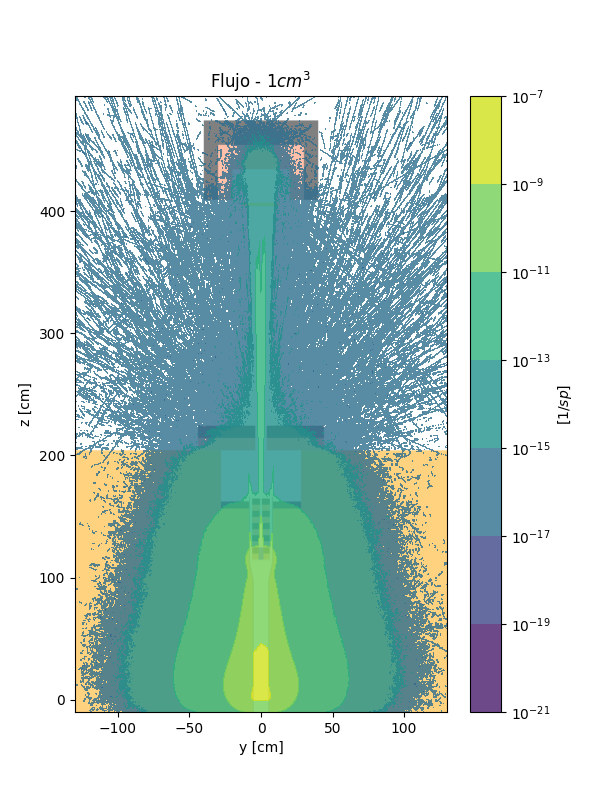

In [34]:
import numpy as np
import openmc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:
# with openmc.StatePoint("statepoint.500.h5") as sp:
    flux_yz = sp.get_tally(name="flux_neutron_yz")

vals_flux = flux_yz.get_values()
grid_flux = vals_flux.reshape(1000,1000)

y, z = np.meshgrid(np.linspace(-130,130,1000),np.linspace(-10,494.2,1000))

fig, ax = plt.subplots(figsize=(6,8))
img = mpimg.imread("plot_4.png")
ax.imshow(img, extent=[-130, 130, -10, 494.2], aspect='auto', alpha=0.5, zorder=1)
contour = ax.contourf(y, z, grid_flux, cmap='viridis', norm=mcolors.LogNorm(), zorder=1.1,alpha=0.8)
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('$[1/sp]$')

ax.set_title('Flujo - $1cm^3$')
ax.set_xlabel('y [cm]')
ax.set_ylabel('z [cm]')
plt.show()

# XY

/tmp/ipykernel_96328/4036666076.py:17: UserWarning: The following kwargs were not used by contour: 'interpolation'
  contour = plt.contourf(x, y, grid_flux, interpolation='nearest',cmap='viridis',norm=mcolors.LogNorm())#, vmin=1e-21, vmax=0.1)


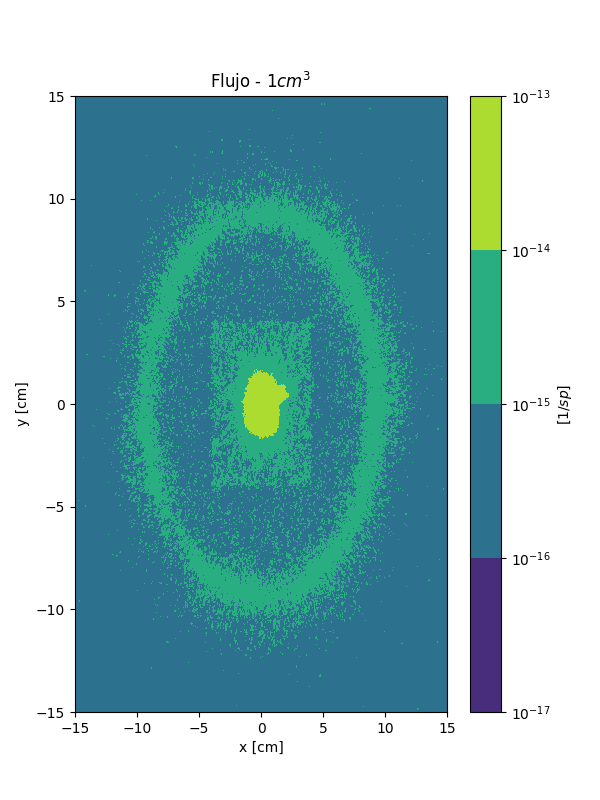

In [35]:
import numpy as np
import openmc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

with openmc.StatePoint(f"statepoint.{batches}.h5") as sp:
    flux_xy = sp.get_tally(name="flux_neutron_xy")

vals_flux = flux_xy.get_values()
grid_flux = vals_flux.reshape(1000,1000)

x, y = np.meshgrid(np.linspace(-15,15,1000),np.linspace(-15,15,1000))

vmin, vmax = 1e-6, 0.0001  # Ajusta estos valores según los datos
levels = np.logspace(vmin, vmax, 9)  # Define 20 niveles de color
plt.figure(figsize=(6,8))
contour = plt.contourf(x, y, grid_flux, interpolation='nearest',cmap='viridis',norm=mcolors.LogNorm())#, vmin=1e-21, vmax=0.1)
cbar = plt.colorbar(contour)
cbar.set_label('$[1/sp]$')



plt.title('Flujo - $1cm^3$')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.show()